# Cross-resonance gate between a transmon and a fluxonium: driving fluxonium

In this notebook we study the cross-resonance two-qubit gate between a transmon and a fluxonium. 

In [1]:
import pathlib

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'  # for hi-dpi displays

In [3]:
TEX_RC_PARAMS = {
    'backend': 'ps',
    #'text.latex.preamble': [r'\usepackage{gensymb}'],
    'axes.labelsize': 10,
    'legend.fontsize': 10,
    "legend.fontsize": 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    #'text.usetex': True,
    'font.family': 'serif',
    "mathtext.fontset": "cm",
}

# Set up directories for data and image saving

In [4]:
NOTEBOOK_DIR = pathlib.Path.cwd()

DATA_FOLDER = NOTEBOOK_DIR / "data"
if not DATA_FOLDER.exists():
    raise ValueError("Data folder with results not found.")

IMG_FOLDER = NOTEBOOK_DIR / "img"
IMG_FOLDER.mkdir(parents=True, exist_ok=True)

In [5]:
LATTICE_TYPE = "mixed"
DRIVE_STR = "low"

# Scans around collision type 1, leading to ZZ crosstalk

### Scan around the $f_{control}^{1 \rightarrow 2} = f_{target}^{0 \rightarrow 1}$ frequency collision

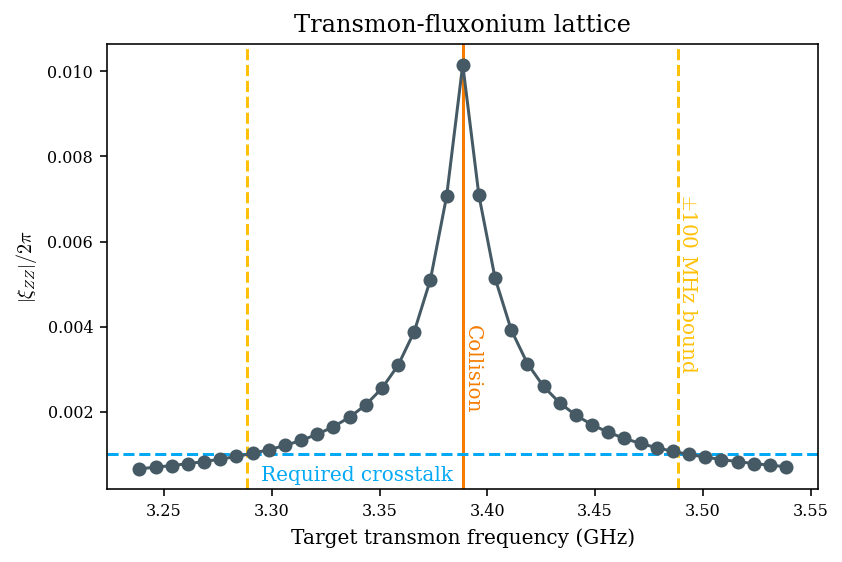

In [6]:
SAVE_IMAGE = True

freq_range = 0.1
min_crosstalk = 1e-3

collision_type = "zz_crosstalk"
trans = "ctrl_12"    
da_name = f"{LATTICE_TYPE}_lat_{collision_type}_col_{trans}_transition_{DRIVE_STR}_drive_scan.nc"

zz_crosstalks = xr.load_dataarray(DATA_FOLDER / da_name)
     
with plt.rc_context(TEX_RC_PARAMS):
    fig, ax = plt.subplots(dpi=100)
    
    ax.axvline(
        zz_crosstalks.collision_cond, 
        linestyle = "-", 
        color="#f57c00"
    )
    ax.text(
        zz_crosstalks.collision_cond, 
        3e-3, 
        "Collision", 
        horizontalalignment="left", 
        verticalalignment="center", 
        rotation=-90, 
        color="#f57c00"
    )

    ax.axhline(min_crosstalk, linestyle = "--", color="#03a9f4")
    ax.text(
        3.295, 
        min_crosstalk - 5e-4, 
        "Required crosstalk", 
        ha="left",  va="center", 
        color="#03a9f4"
    )

    ax.axvline(zz_crosstalks.collision_cond - freq_range, linestyle = "--", color="#ffc107")
    ax.axvline(zz_crosstalks.collision_cond + freq_range, linestyle = "--", color="#ffc107")
    ax.text(
        zz_crosstalks.collision_cond + freq_range, 
        5e-3, 
        f"$\pm${int(freq_range*1e3)} MHz bound", 
        ha="left", va="center", 
        rotation=-90, 
        color="#ffc107"
    )

    ax.plot(zz_crosstalks.target_freq, np.abs(zz_crosstalks), linestyle="-", marker="o", color="#455a64")
    ax.set_ylabel(r"$\left|\xi_{ZZ}\right| / 2\pi$")
    ax.set_xlabel("Target transmon frequency (GHz)")
    ax.set_title("Transmon-fluxonium lattice")

    plt.tight_layout()

    if SAVE_IMAGE:   
        image_name = f"{LATTICE_TYPE}_lat_{collision_type}_col_{trans}_transition_{DRIVE_STR}_drive_bounds"
        for file_format in ['pdf', 'png']:
            full_name = f"{image_name}.{file_format}"
            plt.savefig(
                IMG_FOLDER / full_name,  
                dpi=300,  
                bbox_inches='tight', 
                transparent=True, 
                format=file_format
            )
    plt.show()

### Scan around the $f_{control}^{0 \rightarrow 3} = f_{target}^{0 \rightarrow 1}$ frequency collision

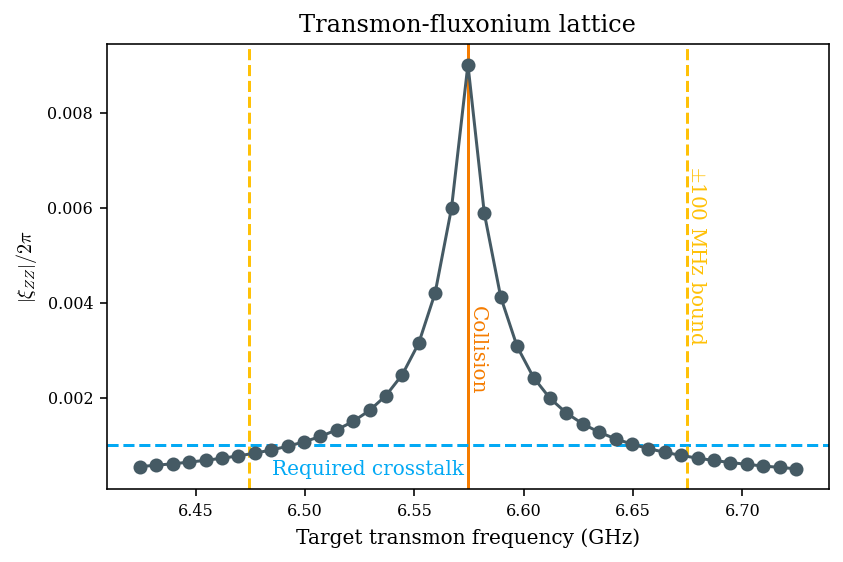

In [7]:
SAVE_IMAGE = True

freq_range = 0.1
min_crosstalk = 1e-3

collision_type = "zz_crosstalk"
trans = "ctrl_03"    
da_name = f"{LATTICE_TYPE}_lat_{collision_type}_col_{trans}_transition_{DRIVE_STR}_drive_scan.nc"

zz_crosstalks = xr.load_dataarray(DATA_FOLDER / da_name)
     
with plt.rc_context(TEX_RC_PARAMS):
    fig, ax = plt.subplots(dpi=100)

    ax.axvline(
        zz_crosstalks.collision_cond, 
        linestyle = "-", 
        color="#f57c00"
    )
    ax.text(
        zz_crosstalks.collision_cond, 
        3e-3, 
        "Collision", 
        horizontalalignment="left", 
        verticalalignment="center", 
        rotation=-90, 
        color="#f57c00"
    )

    ax.axhline(min_crosstalk, linestyle = "--", color="#03a9f4")
    ax.text(
        6.485, 
        min_crosstalk - 5e-4, 
        "Required crosstalk", 
        ha="left",  va="center", 
        color="#03a9f4"
    )

    ax.axvline(zz_crosstalks.collision_cond - freq_range, linestyle = "--", color="#ffc107")
    ax.axvline(zz_crosstalks.collision_cond + freq_range, linestyle = "--", color="#ffc107")
    ax.text(
        zz_crosstalks.collision_cond + freq_range, 
        5e-3, 
        f"$\pm${int(freq_range*1e3)} MHz bound", 
        ha="left", va="center", 
        rotation=-90, 
        color="#ffc107"
    )

    ax.plot(zz_crosstalks.target_freq, np.abs(zz_crosstalks), linestyle="-", marker="o", color="#455a64")
    ax.set_ylabel(r"$\left|\xi_{ZZ}\right| / 2\pi$")
    ax.set_xlabel("Target transmon frequency (GHz)")
    ax.set_title("Transmon-fluxonium lattice")

    plt.tight_layout()

    if SAVE_IMAGE:  
        image_name = f"{LATTICE_TYPE}_lat_{collision_type}_col_{trans}_transition_{DRIVE_STR}_drive_bounds"
        for file_format in ['pdf', 'png']:
            full_name = f"{image_name}.{file_format}"
            plt.savefig(
                IMG_FOLDER / full_name,  
                dpi=300,  
                bbox_inches='tight', 
                transparent=True, 
                format=file_format
            )
    plt.show()

# Scans around the CR collisions (leading to leakage)

### Scan around the $f_{control}^{0 \rightarrow 4} = 2f_{target}^{0 \rightarrow 1}$ frequency collision

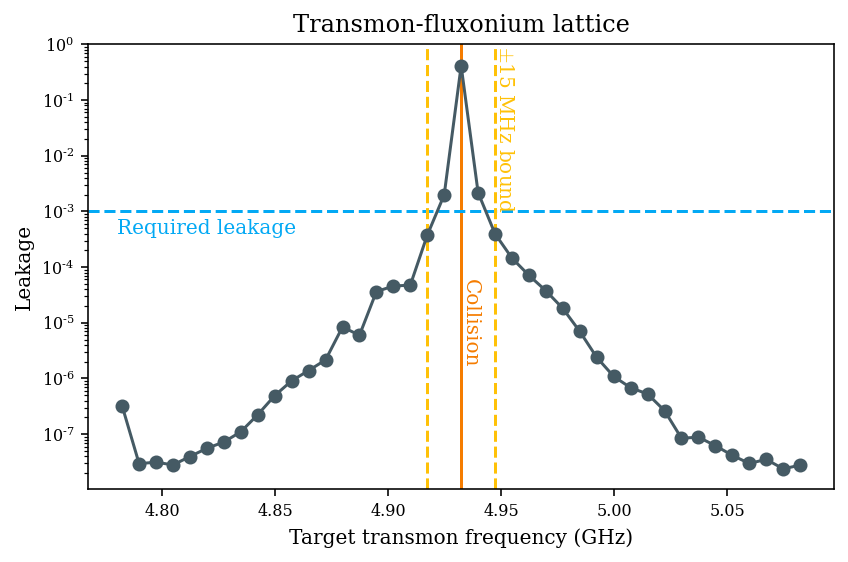

In [8]:
SAVE_IMAGE = True

freq_range = 0.015
min_leakage_rate = 1e-3

collision_type = "cross_res"
n_photons = 2
trans = "ctrl_04"
da_name = f"{LATTICE_TYPE}_lat_{collision_type}_col_{trans}_{n_photons}-photon_transition_{DRIVE_STR}_drive_scan.nc"

leakage_rates = xr.load_dataarray(DATA_FOLDER / da_name)
     
with plt.rc_context(TEX_RC_PARAMS):
    fig, ax = plt.subplots(dpi=100)

    ax.axvline(
        leakage_rates.collision_cond, 
        linestyle = "-", 
        color="#f57c00"
    )
    ax.text(
        leakage_rates.collision_cond, 
        1e-5, 
        "Collision", 
        horizontalalignment="left", 
        verticalalignment="center", 
        rotation=-90, 
        color="#f57c00"
    )

    ax.axhline(min_leakage_rate, linestyle = "--", color="#03a9f4")
    ax.text(
        4.78, 
        min_leakage_rate - 5e-4, 
        "Required leakage", 
        ha="left",  va="center", 
        color="#03a9f4"
    )

    ax.axvline(leakage_rates.collision_cond - freq_range, linestyle = "--", color="#ffc107")
    ax.axvline(leakage_rates.collision_cond + freq_range, linestyle = "--", color="#ffc107")
    ax.text(
        leakage_rates.collision_cond + freq_range, 
        3e-2, 
        f"$\pm${int(freq_range*1e3)} MHz bound", 
        ha="left", va="center", 
        rotation=-90, 
        color="#ffc107"
    )

    ax.plot(leakage_rates.target_freq, leakage_rates, linestyle="-", marker="o", color="#455a64")

    ax.set_yscale("log")
    ax.set_ylabel("Leakage")
    ax.set_xlabel("Target transmon frequency (GHz)")
    ax.set_title("Transmon-fluxonium lattice")
    ax.set_ylim(top=1)
    plt.tight_layout()

    if SAVE_IMAGE:
        image_name = f"{LATTICE_TYPE}_lat_{collision_type}_col_{trans}_{n_photons}-photon_transition_{DRIVE_STR}_drive_bounds"
        for file_format in ['pdf', 'png']:
            full_name = f"{image_name}.{file_format}"
            plt.savefig(
                IMG_FOLDER / full_name,  
                dpi=300,  
                bbox_inches='tight', 
                transparent=True, 
                format=file_format
            )
    plt.show()

### Scan around the $f_{control}^{0 \rightarrow 5} = 3f_{target}^{0 \rightarrow 1}$ frequency collision

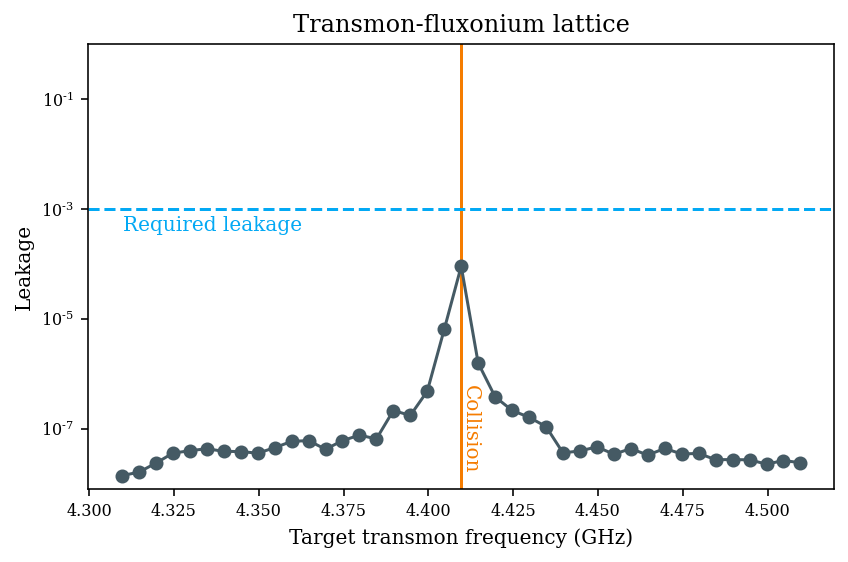

In [9]:
SAVE_IMAGE = True

min_leakage_rate = 1e-3

collision_type = "cross_res"
n_photons = 3
trans = "ctrl_05"
da_name = f"{LATTICE_TYPE}_lat_{collision_type}_col_{trans}_{n_photons}-photon_transition_{DRIVE_STR}_drive_scan.nc"

leakage_rates = xr.load_dataarray(DATA_FOLDER / da_name)
     
with plt.rc_context(TEX_RC_PARAMS):
    fig, ax = plt.subplots(dpi=200)

    ax.axvline(
        leakage_rates.collision_cond, 
        linestyle = "-", 
        color="#f57c00"
    )
    ax.text(
        leakage_rates.collision_cond, 
        1e-7, 
        "Collision", 
        horizontalalignment="left", 
        verticalalignment="center", 
        rotation=-90, 
        color="#f57c00"
    )

    ax.axhline(min_leakage_rate, linestyle = "--", color="#03a9f4")
    ax.text(
        4.31, 
        min_leakage_rate - 5e-4, 
        "Required leakage", 
        ha="left",  va="center", 
        color="#03a9f4"
    )

    ax.plot(leakage_rates.target_freq, leakage_rates, linestyle="-", marker="o", color="#455a64")

    ax.set_yscale("log")
    ax.set_ylabel("Leakage")
    ax.set_xlabel("Target transmon frequency (GHz)")
    ax.set_title("Transmon-fluxonium lattice")
    ax.set_ylim(top=1)
    plt.tight_layout()

    if SAVE_IMAGE:
        image_name = f"{LATTICE_TYPE}_lat_{collision_type}_col_{trans}_{n_photons}-photon_transition_{DRIVE_STR}_drive_bounds"
        for file_format in ['pdf', 'png']:
            full_name = f"{image_name}.{file_format}"
            plt.savefig(
                IMG_FOLDER / full_name,  
                dpi=300,  
                bbox_inches='tight', 
                transparent=True, 
                format=file_format
            )
    plt.show()

### Scan around the $f_{control}^{1 \rightarrow 5} = 2f_{target}^{0 \rightarrow 1}$ and $f_{control}^{0 \rightarrow 3} + f_{target}^{1 \rightarrow 2} = 2f_{target}^{0 \rightarrow 1}$ frequency collisions

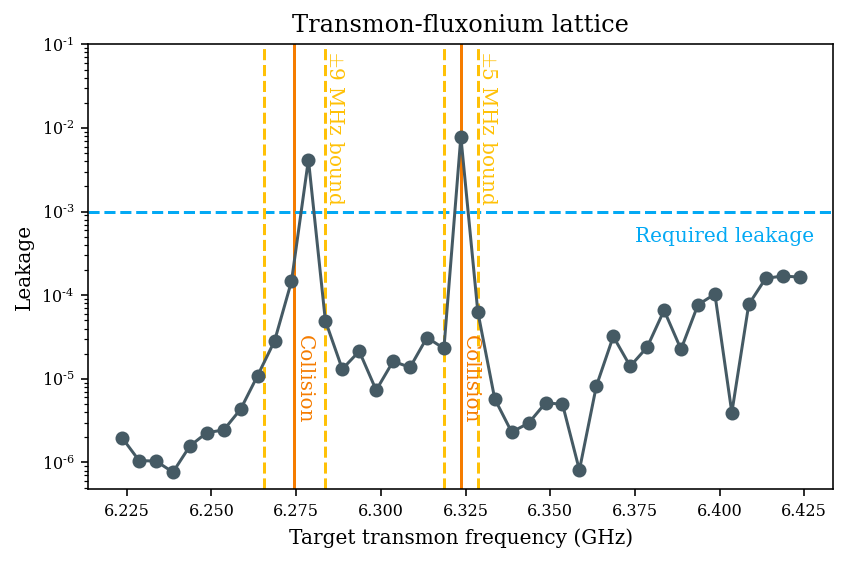

In [10]:
SAVE_IMAGE = True

freq_range_1 = 0.005
freq_range_2 = 0.009

min_leakage_rate = 1e-3

collision_type = "cross_res"
n_photons_1 = 2
trans_1 = "ctrl_15"

n_photons_2 = 2
trans_2 = "ctrl_03_tar_12"
da_name = f"{LATTICE_TYPE}_lat_{collision_type}_col_{trans_1}_{n_photons_1}-photon_transition_{DRIVE_STR}_drive_scan.nc"

leakage_rates = xr.load_dataarray(DATA_FOLDER / da_name)

collision_cond_1 = leakage_rates.collision_cond
collision_cond_2 = 6.274488472163292

     
with plt.rc_context(TEX_RC_PARAMS):
    fig, ax = plt.subplots(dpi=200)

    ax.axvline(
        collision_cond_1,
        linestyle = "-", 
        color="#f57c00"
    )
    ax.axvline(
        collision_cond_2, 
        linestyle = "-", 
        color="#f57c00"
    )
    ax.text(
        collision_cond_1, 
        1e-5, 
        "Collision", 
        horizontalalignment="left", 
        verticalalignment="center", 
        rotation=-90, 
        color="#f57c00"
    )
    ax.text(
        collision_cond_2, 
        1e-5, 
        "Collision", 
        horizontalalignment="left", 
        verticalalignment="center", 
        rotation=-90, 
        color="#f57c00"
    )

    ax.axhline(min_leakage_rate, linestyle = "--", color="#03a9f4")
    
    ax.text(
        6.375, 
        min_leakage_rate - 5e-4, 
        "Required leakage", 
        ha="left",  va="center", 
        color="#03a9f4"
    )

    ax.axvline(collision_cond_1 - freq_range_1, linestyle = "--", color="#ffc107")
    ax.axvline(collision_cond_1 + freq_range_1, linestyle = "--", color="#ffc107")
    ax.text(
        collision_cond_1 + freq_range_1, 
        1e-2, 
        f"$\pm${int(freq_range_1*1e3)} MHz bound", 
        ha="left", va="center", 
        rotation=-90, 
        color="#ffc107"
    )
    
    ax.axvline(collision_cond_2 - freq_range_2, linestyle = "--", color="#ffc107")
    ax.axvline(collision_cond_2 + freq_range_2, linestyle = "--", color="#ffc107")
    ax.text(
        collision_cond_2 + freq_range_2, 
        1e-2, 
        f"$\pm${int(freq_range_2*1e3)} MHz bound", 
        ha="left", va="center", 
        rotation=-90, 
        color="#ffc107"
    )

    ax.plot(leakage_rates.target_freq, leakage_rates, linestyle="-", marker="o", color="#455a64")

    ax.set_yscale("log")
    ax.set_ylabel("Leakage")
    ax.set_xlabel("Target transmon frequency (GHz)")
    ax.set_title("Transmon-fluxonium lattice")
    ax.set_ylim(top=1e-1)
    plt.tight_layout()

    if SAVE_IMAGE:
        image_name = f"{LATTICE_TYPE}_lat_{collision_type}_col_{trans_1}_{n_photons_1}-photon_transition_and_col_{trans_2}_{n_photons_1}-photon_transition_{DRIVE_STR}_drive_bounds"
        for file_format in ['pdf', 'png']:
            full_name = f"{image_name}.{file_format}"
            plt.savefig(
                IMG_FOLDER / full_name,  
                dpi=300,  
                bbox_inches='tight', 
                transparent=True, 
                format=file_format
            )
    plt.show()

# Scans of collisions involving a spectator transmon

### Scan around the $f_{spec}^{0 \rightarrow 1} + f_{target}^{0\rightarrow 1} = f_{control}^{0\rightarrow 4}$ frequency collision

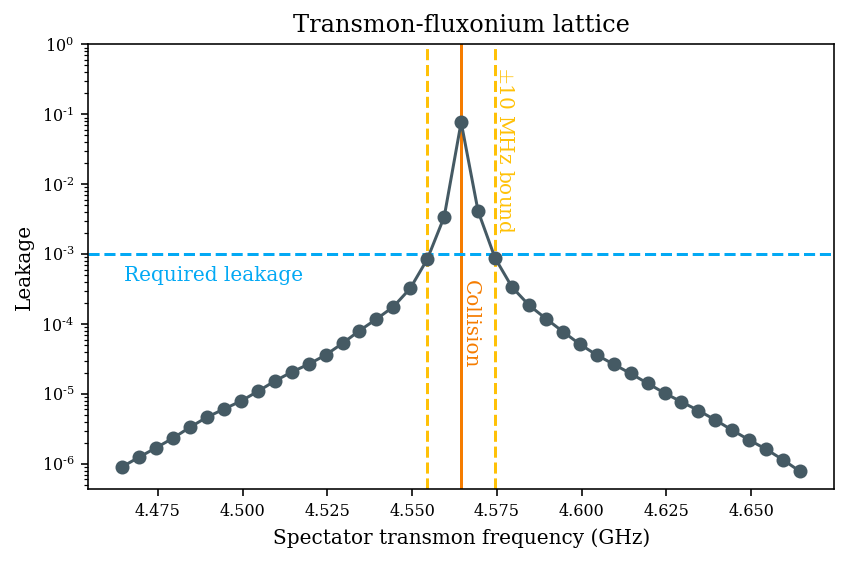

In [11]:
SAVE_IMAGE = True

freq_range = 0.010
min_leakage_rate = 1e-3

collision_type = "spectator"
n_photons = 2
trans = "ctrl_04"
da_name = f"{LATTICE_TYPE}_lat_{collision_type}_col_{trans}_{n_photons}-photon_transition_{DRIVE_STR}_drive_scan.nc"

leakage_rates = xr.load_dataarray(DATA_FOLDER / da_name)
     
with plt.rc_context(TEX_RC_PARAMS):
    fig, ax = plt.subplots(dpi=200)

    ax.axvline(
        leakage_rates.collision_cond, 
        linestyle = "-", 
        color="#f57c00"
    )
    ax.text(
        leakage_rates.collision_cond, 
        1e-4, 
        "Collision", 
        horizontalalignment="left", 
        verticalalignment="center", 
        rotation=-90, 
        color="#f57c00"
    )

    ax.axhline(min_leakage_rate, linestyle = "--", color="#03a9f4")
    ax.text(
        4.465, 
        min_leakage_rate - 5e-4, 
        "Required leakage", 
        ha="left",  va="center", 
        color="#03a9f4"
    )

    ax.axvline(leakage_rates.collision_cond - freq_range, linestyle = "--", color="#ffc107")
    ax.axvline(leakage_rates.collision_cond + freq_range, linestyle = "--", color="#ffc107")
    ax.text(
        leakage_rates.collision_cond + freq_range, 
        3e-2, 
        f"$\pm${int(freq_range*1e3)} MHz bound", 
        ha="left", va="center", 
        rotation=-90, 
        color="#ffc107"
    )

    ax.plot(leakage_rates.spectator_freq, leakage_rates, linestyle="-", marker="o", color="#455a64")

    ax.set_yscale("log")
    ax.set_ylabel("Leakage")
    ax.set_xlabel("Spectator transmon frequency (GHz)")
    ax.set_title("Transmon-fluxonium lattice")
    ax.set_ylim(top=1)

    plt.tight_layout()

    if SAVE_IMAGE:
        lattice_type = "mixed"
        collision_type = "spectator"
        n_photons = 2
        trans = "ctrl_04"
        image_name = f"{LATTICE_TYPE}_lat_{collision_type}_col_{trans}_{n_photons}-photon_transition_{DRIVE_STR}_drive_bounds"
        for file_format in ['pdf', 'png']:
            full_name = f"{image_name}.{file_format}"
            plt.savefig(
                IMG_FOLDER / full_name,  
                dpi=300,  
                bbox_inches='tight', 
                transparent=True, 
                format=file_format
            )
    plt.show()

### Scan around the $f_{spec}^{1 \rightarrow 2} = f_{target}^{0\rightarrow1}$ frequency collision

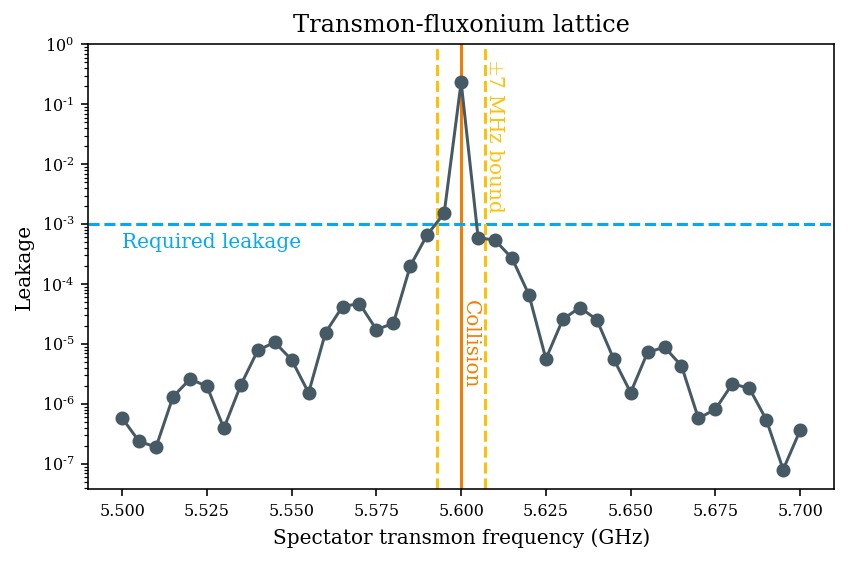

In [12]:
SAVE_IMAGE = True

freq_range = 0.007
min_leakage_rate = 1e-3

collision_type = "spectator"
n_photons = 1
trans = "spec_12"
da_name = f"{LATTICE_TYPE}_lat_{collision_type}_col_{trans}_{n_photons}-photon_transition_{DRIVE_STR}_drive_scan.nc"
    
leakage_rates = xr.load_dataarray(DATA_FOLDER / da_name)
     
with plt.rc_context(TEX_RC_PARAMS):
    fig, ax = plt.subplots(dpi=200)

    ax.axvline(
        leakage_rates.collision_cond, 
        linestyle = "-", 
        color="#f57c00"
    )
    ax.text(
        leakage_rates.collision_cond, 
        1e-5, 
        "Collision", 
        horizontalalignment="left", 
        verticalalignment="center", 
        rotation=-90, 
        color="#f57c00"
    )

    ax.axhline(min_leakage_rate, linestyle = "--", color="#03a9f4")
    ax.text(
        5.5, 
        min_leakage_rate - 5e-4, 
        "Required leakage", 
        ha="left",  va="center", 
        color="#03a9f4"
    )

    ax.axvline(leakage_rates.collision_cond - freq_range, linestyle = "--", color="#ffc107")
    ax.axvline(leakage_rates.collision_cond + freq_range, linestyle = "--", color="#ffc107")
    ax.text(
        leakage_rates.collision_cond + freq_range, 
        3e-2, 
        f"$\pm${int(freq_range*1e3)} MHz bound", 
        ha="left", va="center", 
        rotation=-90, 
        color="#ffc107"
    )

    ax.plot(leakage_rates.spectator_freq, leakage_rates, linestyle="-", marker="o", color="#455a64")

    ax.set_yscale("log")
    ax.set_ylabel("Leakage")
    ax.set_xlabel("Spectator transmon frequency (GHz)")
    ax.set_title("Transmon-fluxonium lattice")
    ax.set_ylim(top=1)
    plt.tight_layout()

    if SAVE_IMAGE:
        image_name = f"{LATTICE_TYPE}_lat_{collision_type}_col_{trans}_{n_photons}-photon_transition_{DRIVE_STR}_drive_bounds"
        for file_format in ['pdf', 'png']:
            full_name = f"{image_name}.{file_format}"
            plt.savefig(
                IMG_FOLDER / full_name,  
                dpi=300,  
                bbox_inches='tight', 
                transparent=True, 
                format=file_format
            )
    plt.show()

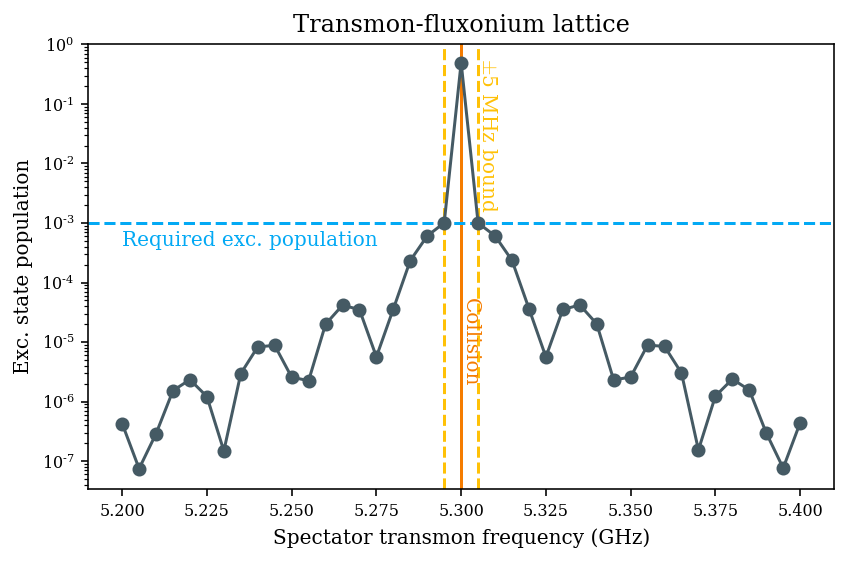

In [19]:
SAVE_IMAGE = True

freq_range = 0.005
min_population = 1e-3

collision_type = "spectator"
n_photons = 1
trans = "spec_01"
da_name = f"{LATTICE_TYPE}_lat_{collision_type}_col_{trans}_{n_photons}-photon_transition_{DRIVE_STR}_drive_scan.nc"
    
exc_populations = xr.load_dataarray(DATA_FOLDER / da_name)

with plt.rc_context(TEX_RC_PARAMS):
    fig, ax = plt.subplots(dpi=200)
    
    ax.axvline(
        exc_populations.collision_cond, 
        linestyle = "-", 
        color="#f57c00"
    )
    ax.text(
        exc_populations.collision_cond, 
        1e-5, 
        "Collision", 
        horizontalalignment="left", 
        verticalalignment="center", 
        rotation=-90, 
        color="#f57c00"
    )

    ax.axhline(min_population, linestyle = "--", color="#03a9f4")
    ax.text(
        5.2, 
        min_population - 5e-4, 
        "Required exc. population", 
        ha="left",  va="center", 
        color="#03a9f4"
    )

    ax.axvline(exc_populations.collision_cond - freq_range, linestyle = "--", color="#ffc107")
    ax.axvline(exc_populations.collision_cond + freq_range, linestyle = "--", color="#ffc107")
    ax.text(
        exc_populations.collision_cond + freq_range, 
        3e-2, 
        f"$\pm${int(freq_range*1e3)} MHz bound", 
        ha="left", va="center", 
        rotation=-90, 
        color="#ffc107"
    )
    
    ax.plot(exc_populations.spectator_freq, exc_populations, linestyle="-", marker="o", color="#455a64")

    ax.set_yscale("log")
    ax.set_ylabel("Exc. state population")
    ax.set_xlabel("Spectator transmon frequency (GHz)")
    ax.set_title("Transmon-fluxonium lattice")
    ax.set_ylim(top=1)
    plt.tight_layout()
    
    if SAVE_IMAGE:
        image_name = f"{LATTICE_TYPE}_lat_{collision_type}_col_{trans}_{n_photons}-photon_transition_{DRIVE_STR}_drive_bounds"
        for file_format in ['pdf', 'png']:
            full_name = f"{image_name}.{file_format}"
            plt.savefig(
                IMG_FOLDER / full_name,  
                dpi=300,  
                bbox_inches='tight', 
                transparent=True, 
                format=file_format
            )
    
    plt.show()